In [ ]:
from pathlib import Path
import geopandas as gpd
from failure_analysis_functions import cluster_connected,aggregate_clusters_to_points

region_list = ["Achterhoek"]

for region in region_list:
    print(f"Processing region: {region} network")
    root_dir = Path(rf"P:\bovenregionale-stresstest-hwn\Analysis\{region}\Outputs")
    network_file = root_dir / "base_network_hazard.gpkg"
    flood_map = Path(rf"P:\bovenregionale-stresstest-hwn\Analysis\{region}\Inputs\static\*.tif")


Processing region: Achterhoek network


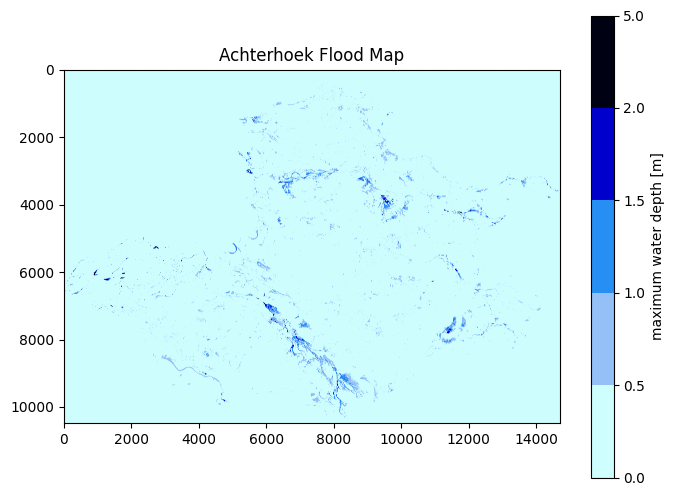

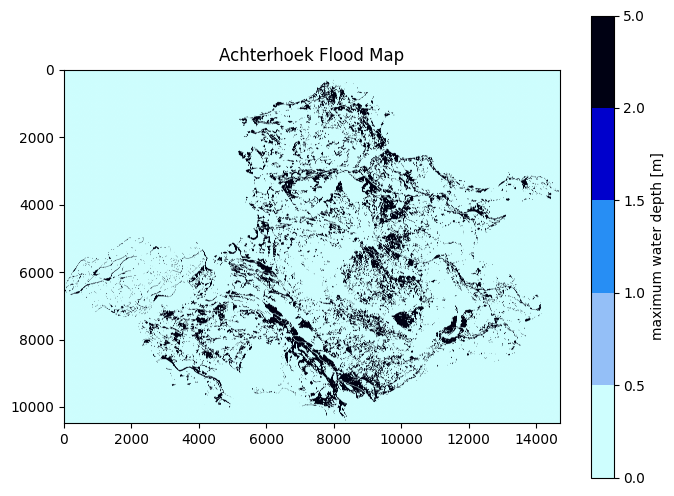

In [ ]:
import matplotlib.colors as mcolors

cbar_label = 'maximum water depth [m]'
vmin = 0
vmax = 5
levels = [vmin, 0.5, 1, 1.5, 2, vmax]
colors = ["#cefefe00",'#94bff7','#278ef4','#0000cc',"#080564","#000113"]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(levels, cmap.N)

region_list = ["Achterhoek"]

for region in region_list:
    print(f"Processing region: {region} network")
    root_dir = Path(rf"P:\bovenregionale-stresstest-hwn\Analysis\{region}\Outputs")
    network_file = root_dir / "base_network_hazard.gpkg"
    flood_map_files = glob.glob(rf"P:\bovenregionale-stresstest-hwn\Analysis\{region}\Inputs\static\hazard\*.tif")
    for flood_map_file in flood_map_files:
        with rasterio.open(flood_map_file) as src:
            flood_data = src.read(1)
            plt.figure(figsize=(8,6))
            im = plt.imshow(flood_data, cmap=cmap, norm=norm)
            plt.colorbar(im, label=cbar_label)
            plt.title(f"{region} Flood Map")
            plt.axis('off')
            plt.show()
            

Processing region: Achterhoek
Processing region: Achterhoek network


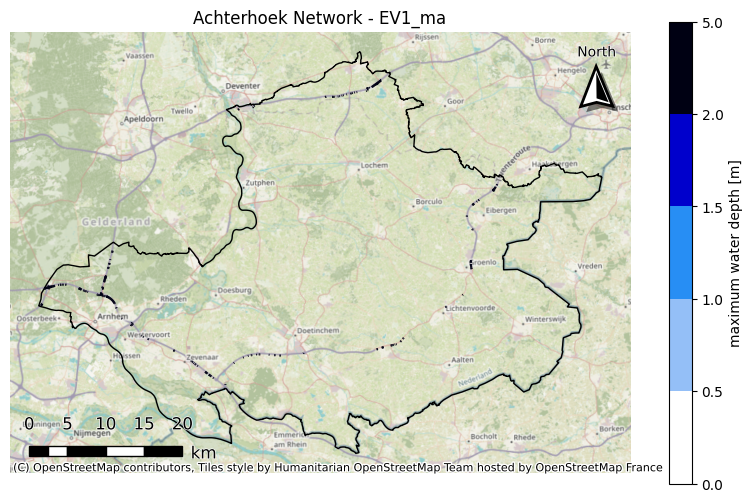

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import contextily as ctx

from matplotlib_map_utils.core.north_arrow import NorthArrow, north_arrow
from matplotlib_map_utils.core.scale_bar import ScaleBar, scale_bar

cbar_label = 'maximum water depth [m]'
vmin = 0
vmax = 5
levels = [vmin, 0.5, 1, 1.5, 2, vmax]
colors = ["#cefefe00",'#94bff7','#278ef4','#0000cc',"#080564","#000113"]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(levels, cmap.N)

for region in region_list:
    region_shapefile = Path(r"P:\bovenregionale-stresstest-hwn\Data\Hazard_maps\Gebiedsindeling obv waterschappen EXPORT 4dec24.gpkg")
    region_gdf = gpd.read_file(region_shapefile)
    filtered_region = region_gdf[region_gdf['name'] == region]
    print(f"Processing region: {region}")
    print(f"Processing region: {region} network")
    root_dir = Path(rf"P:\bovenregionale-stresstest-hwn\Analysis\{region}\Outputs")
    network_file = root_dir / "base_network_hazard.gpkg"
    network_gdf = gpd.read_file(network_file)

    filtered_region_28992 = filtered_region.to_crs(epsg=28992)
    network_gdf = network_gdf.to_crs(epsg=28992)

    fig, ax = plt.subplots(figsize=(10, 10))
    filtered_region_28992.boundary.plot(ax=ax, color='black', linewidth=1)  # Thicker lines
    #network_gdf.boundary.plot(ax=ax, color='black', linewidth=0.1)
    network_gdf.plot(
        ax=ax, column='EV1_ma', cmap=cmap, norm=norm, markersize=10, legend=False
    )
    ctx.add_basemap(ax, crs='EPSG:28992')
    ax.set_axis_off()
    plt.title(f"{region} Network - EV1_ma")

    # Add custom colorbar with reduced height
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, boundaries=levels, ticks=levels, label=cbar_label, shrink=0.6)

    north_arrow(
        ax, location="upper right", rotation={"crs": "EPSG:28992", "reference": "center"},
        scale=0.4,
        base={"edgecolor": "black", "linewidth": 2},
        label={"position": "top", "text": "North", "fontsize": 10}
    )
    

    # Add stepped scale bar with white background
    scalebar = scale_bar(
        ax, location="lower left", style="boxes", bar={"projection": "EPSG:28992","unit": "km"},
        #scale=0.4,
    )
    

    plt.show()


Processing region: Achterhoek network


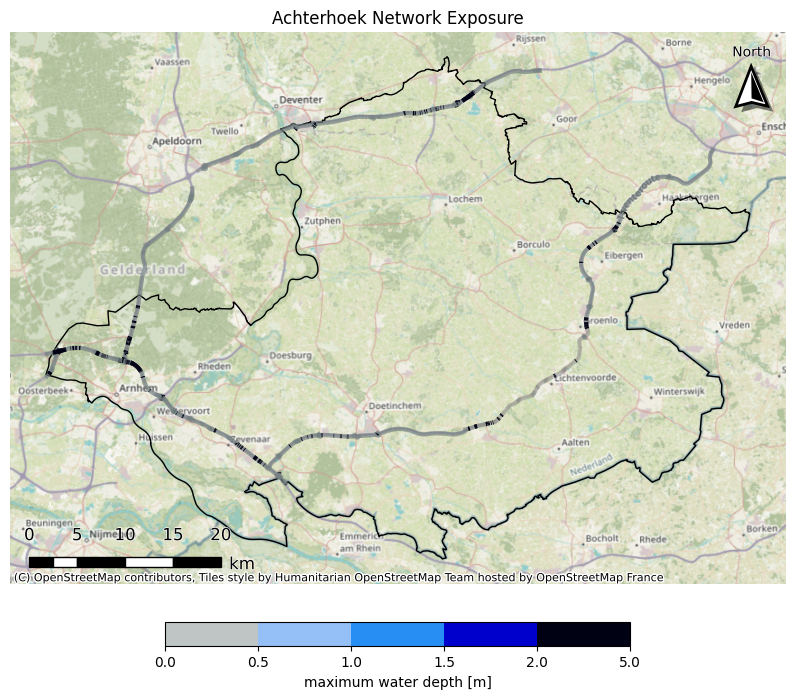

In [73]:
from pathlib import Path
import geopandas as gpd
import glob
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import contextily as ctx

from matplotlib_map_utils.core.north_arrow import NorthArrow, north_arrow
from matplotlib_map_utils.core.scale_bar import ScaleBar, scale_bar

# Colorbar and colormap setup
cbar_label = 'maximum water depth [m]'
vmin = 0
vmax = 5
levels = [vmin, 0.5, 1, 1.5, 2, vmax]
colors = ["#76828276", '#94bff7', '#278ef4', '#0000cc', "#080564", "#000113"]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(levels, cmap.N)

region_list = ["Achterhoek"]

for region in region_list:
    print(f"Processing region: {region} network")
    root_dir = Path(rf"P:\bovenregionale-stresstest-hwn\Analysis\{region}\Outputs")
    network_file = root_dir / "base_network_hazard.gpkg"
    
    # Plot network and region
    region_shapefile = Path(r"P:\bovenregionale-stresstest-hwn\Data\Hazard_maps\Gebiedsindeling obv waterschappen EXPORT 4dec24.gpkg")
    region_gdf = gpd.read_file(region_shapefile)
    filtered_region = region_gdf[region_gdf['name'] == region]
    network_gdf = gpd.read_file(network_file)

    filtered_region_28992 = filtered_region.to_crs(epsg=28992)
    network_gdf = network_gdf.to_crs(epsg=28992)

    fig, ax = plt.subplots(figsize=(10, 10))
    filtered_region_28992.boundary.plot(ax=ax, color='black', linewidth=1)  # Thicker lines

    # Plot network_gdf boundaries in black
    #network_gdf.boundary.plot(ax=ax, color='black', linewidth=1)

    # Plot EV1_ma with increased linewidth
    network_gdf.plot(
        ax=ax, column='EV1_ma', cmap=cmap, norm=norm, markersize=1, legend=False, linewidth=3
    )

    ctx.add_basemap(ax, crs='EPSG:28992')
    ax.set_axis_off()
    plt.title(f"{region} Network Exposure")

    # Add custom colorbar with reduced height and horizontal orientation
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(
        sm, ax=ax, boundaries=levels, ticks=levels, label=cbar_label, shrink=0.6, orientation='horizontal', pad=0.05
    )

    north_arrow(
        ax, location="upper right", rotation={"crs": "EPSG:28992", "reference": "center"},
        scale=0.4,
        base={"edgecolor": "black", "linewidth": 2},
        label={"position": "top", "text": "North", "fontsize": 10}
    )

    # Add stepped scale bar with white background
    scalebar = scale_bar(
        ax, location="lower left", style="boxes", bar={"projection": "EPSG:28992", "unit": "km"},
    )